In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [99]:
p152=pd.read_csv("pronostico_dataset.csv", sep=";",index_col="ID")

In [100]:
p152.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           6000 non-null   float64
 1   systolic_bp   6000 non-null   float64
 2   diastolic_bp  6000 non-null   float64
 3   cholesterol   6000 non-null   float64
 4   prognosis     6000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 281.2+ KB


In [101]:
numeric_column=['age', 'systolic_bp', 'diastolic_bp', 'cholesterol']

prognosis: (0 or 1) (Target). It is 1 if the patient has retinopathy and 0 if he doesn't.

In [102]:
"""p152["prognosis"].replace({"retinopathy":1,"no_retinopathy":0}, inplace=True)"""

'p152["prognosis"].replace({"retinopathy":1,"no_retinopathy":0}, inplace=True)'

In [103]:
p152

age  systolic_bp  diastolic_bp  cholesterol       prognosis
ID                                                                     
0     77.196340    85.288742     80.021878    79.957109     retinopathy
1     63.529850    99.379736     84.852361   110.382411     retinopathy
2     69.003986   111.349455    109.850616   100.828246     retinopathy
3     82.638210    95.056128     79.666851    87.066303     retinopathy
4     78.346286   109.154591     90.713220    92.511770     retinopathy
...         ...          ...           ...          ...             ...
5995  49.611850    94.857639     86.615671   107.643986  no_retinopathy
5996  63.099686   100.039527     93.515186   104.971404     retinopathy
5997  55.562243    98.421446    102.697875   120.875951     retinopathy
5998  63.468956   106.809289     88.060631   106.052213     retinopathy
5999  62.506825    96.900784     86.878033   108.625436  no_retinopathy

[6000 rows x 5 columns]

In [104]:
p152["prognosis"].value_counts()

retinopathy       3087
no_retinopathy    2913
Name: prognosis, dtype: int64

<AxesSubplot:>

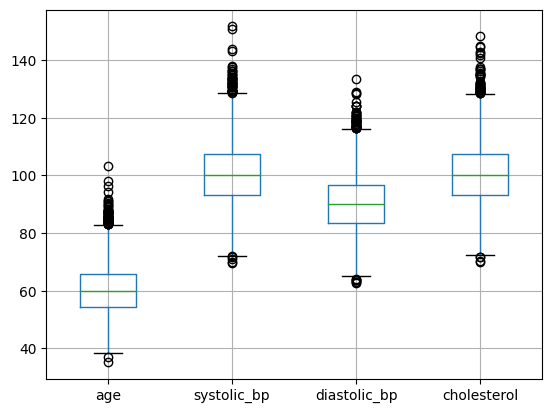

In [105]:
p152[numeric_column].boxplot()

In [106]:
p152.describe()

age  systolic_bp  diastolic_bp  cholesterol
count  6000.000000  6000.000000   6000.000000  6000.000000
mean     60.464121   100.694822     90.505547   100.628255
std       8.564392    10.669267      9.648200    10.433915
min      35.164761    69.675429     62.807105    69.967453
25%      54.371941    93.267420     83.641788    93.202373
50%      59.831159   100.119926     89.912429   100.060637
75%      65.809652   107.439501     96.682405   107.250829
max     103.279497   151.699660    133.456382   148.233544

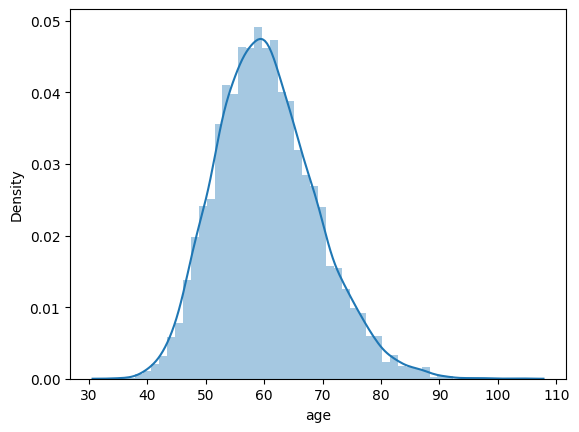

In [107]:
sns.distplot(p152[p152.columns[0]]);

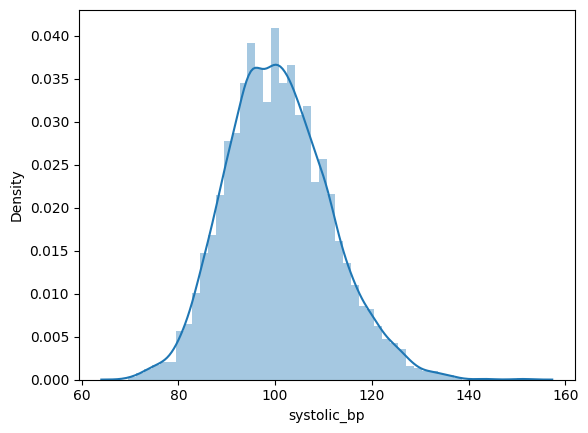

In [108]:
sns.distplot(p152[p152.columns[1]]);

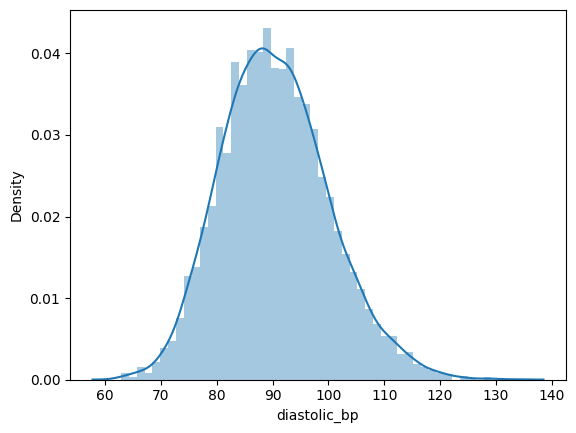

In [109]:
sns.distplot(p152[p152.columns[2]]);

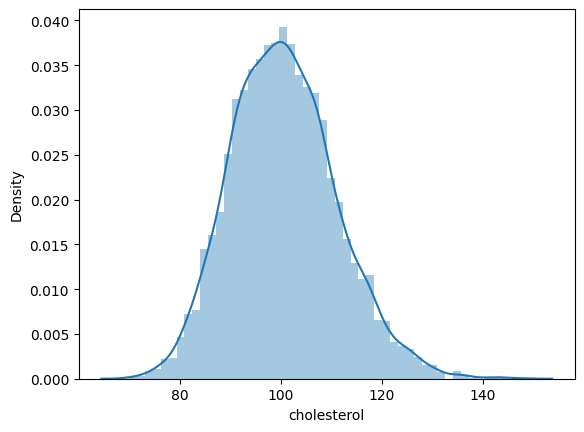

In [110]:
sns.distplot(p152[p152.columns[3]]);

In [111]:
log_=lambda x: np.log(x)

In [112]:
p152_log=p152[numeric_column].apply(log_)

In [113]:
p152_log["prognosis"]=p152["prognosis"]

In [114]:
p152_log

age  systolic_bp  diastolic_bp  cholesterol       prognosis
ID                                                                    
0     4.346352     4.446042      4.382300     4.381490     retinopathy
1     4.151510     4.598948      4.440913     4.703951     retinopathy
2     4.234164     4.712673      4.699121     4.613419     retinopathy
3     4.414472     4.554468      4.377854     4.466670     retinopathy
4     4.361139     4.692765      4.507703     4.527336     retinopathy
...        ...          ...           ...          ...             ...
5995  3.904230     4.552377      4.461481     4.678829  no_retinopathy
5996  4.144716     4.605565      4.538124     4.653688     retinopathy
5997  4.017504     4.589259      4.631791     4.794765     retinopathy
5998  4.150551     4.671045      4.478026     4.663932     retinopathy
5999  4.135276     4.573688      4.464505     4.687906  no_retinopathy

[6000 rows x 5 columns]

<AxesSubplot:xlabel='age', ylabel='Density'>

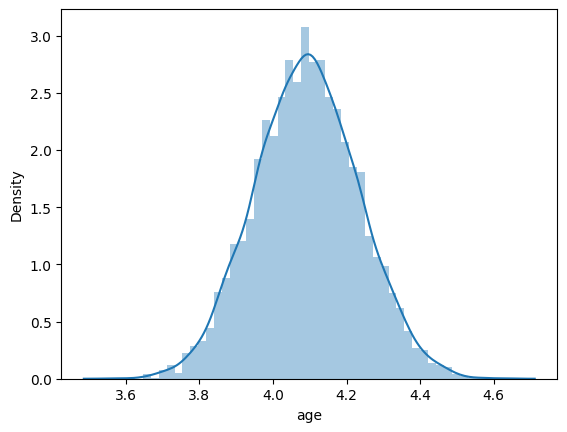

In [115]:
sns.distplot(p152_log[p152.columns[0]])

<AxesSubplot:xlabel='systolic_bp', ylabel='Density'>

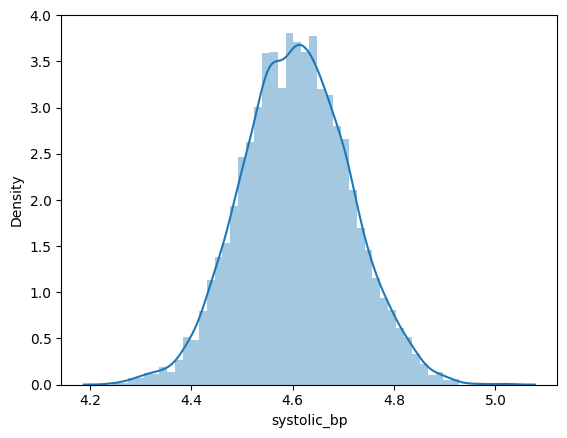

In [116]:
sns.distplot(p152_log[p152.columns[1]])

<AxesSubplot:xlabel='diastolic_bp', ylabel='Density'>

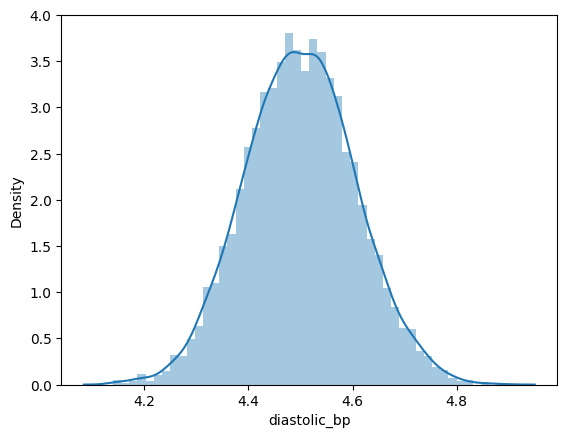

In [117]:
sns.distplot(p152_log[p152.columns[2]])

<AxesSubplot:xlabel='cholesterol', ylabel='Density'>

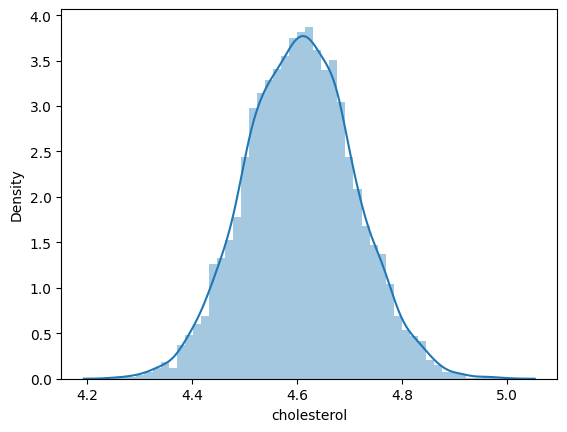

In [118]:
sns.distplot(p152_log[p152.columns[3]])

<AxesSubplot:>

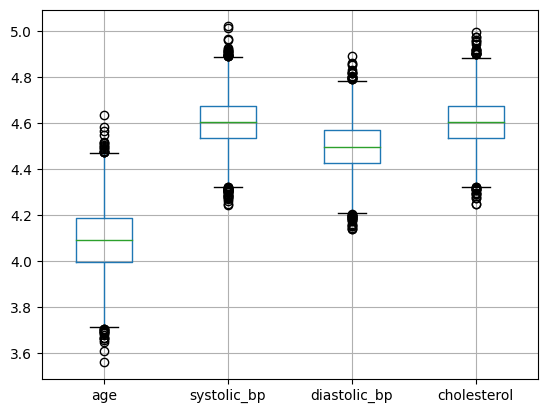

In [119]:
p152_log[numeric_column].boxplot()

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
normal_model=LogisticRegression()
log_model=LogisticRegression()

In [122]:
p152.columns

Index(['age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

In [123]:
x_normal=p152[numeric_column]
y_normal=p152["prognosis"]

In [124]:
for i in range(1,20):
    model=LogisticRegression(C=i)
    model.fit(x_normal,y_normal)
    print(f"C:{i} ",model.score(x_normal,y_normal))

C:1  0.7443333333333333
C:2  0.7443333333333333
C:3  0.7443333333333333
C:4  0.7443333333333333
C:5  0.7443333333333333
C:6  0.7443333333333333
C:7  0.7443333333333333
C:8  0.7443333333333333
C:9  0.7443333333333333
C:10  0.7443333333333333
C:11  0.7443333333333333
C:12  0.7443333333333333
C:13  0.7443333333333333
C:14  0.7443333333333333
C:15  0.7443333333333333
C:16  0.7443333333333333
C:17  0.7443333333333333
C:18  0.7443333333333333
C:19  0.7443333333333333


In [125]:
normal_model.fit(x_normal,y_normal)
normal_model.score(x_normal,y_normal)

0.7443333333333333

In [126]:
x_log=p152_log[numeric_column]
y_log=p152_log["prognosis"]

In [127]:
for i in range(1,20):
    model=LogisticRegression(C=i)
    model.fit(x_log,y_log)
    print(f"C:{i} ",model.score(x_log,y_log))

C:1  0.7421666666666666
C:2  0.7415
C:3  0.7423333333333333
C:4  0.7421666666666666
C:5  0.7421666666666666
C:6  0.7418333333333333
C:7  0.7418333333333333
C:8  0.7418333333333333
C:9  0.7418333333333333
C:10  0.7418333333333333
C:11  0.7418333333333333
C:12  0.742
C:13  0.742
C:14  0.742
C:15  0.742
C:16  0.742
C:17  0.742
C:18  0.742
C:19  0.742


In [128]:
log_model.fit(x_log,y_log)
log_model.score(x_log,y_log)

0.7421666666666666

In [129]:
p152[p152.duplicated()]

Empty DataFrame
Columns: [age, systolic_bp, diastolic_bp, cholesterol, prognosis]
Index: []

<AxesSubplot:>

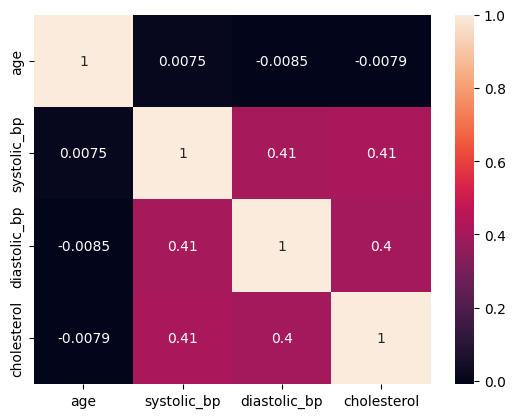

In [130]:
sns.heatmap(p152_log.corr(), annot=True)

In [131]:
p152_log.columns

Index(['age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

Performing PCA for better understanding


In [132]:
from sklearn.decomposition import PCA

In [133]:
pca = PCA(n_components = 4)
pca_values = pca.fit_transform(p152_log[numeric_column])

In [134]:
pca_values=pd.DataFrame(pca_values,columns=["Pc1","Pc2","Pc3","Pc4"])

In [135]:
pca.explained_variance_ratio_

array([0.37845205, 0.37412518, 0.12610119, 0.12132158])

In [136]:
# Cumulative variance 
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4)*100)
var1

array([ 37.85,  75.26,  87.87, 100.  ])

In [137]:
pca.components_

array([[-0.340348  ,  0.54776159,  0.55550842,  0.52491035],
       [ 0.94019009,  0.21063975,  0.19429614,  0.18418061],
       [ 0.00902026, -0.49120981,  0.80473913, -0.33320637],
       [-0.01115648,  0.64366222,  0.07780958, -0.76126221]])

In [138]:
pca_values["prognosis"]=p152["prognosis"]
pca_values

Pc1       Pc2       Pc3       Pc4       prognosis
0    -0.357581  0.141014  0.061432  0.055721     retinopathy
1    -0.005688  0.060812 -0.075713 -0.084602     retinopathy
2     0.124390  0.195973  0.107126  0.076687     retinopathy
3    -0.279133  0.242723 -0.023174  0.059560     retinopathy
4    -0.081250  0.258113 -0.007308  0.113093     retinopathy
...        ...       ...       ...       ...             ...
5995  0.051202 -0.182118 -0.030145 -0.091094  no_retinopathy
5996  0.027867  0.065449  0.015953 -0.034439     retinopathy
5997  0.188317 -0.013407  0.051186 -0.143624     retinopathy
5998  0.033740  0.074937 -0.067935 -0.004832     retinopathy
5999 -0.009316  0.041857 -0.039119 -0.086629  no_retinopathy

[6000 rows x 5 columns]

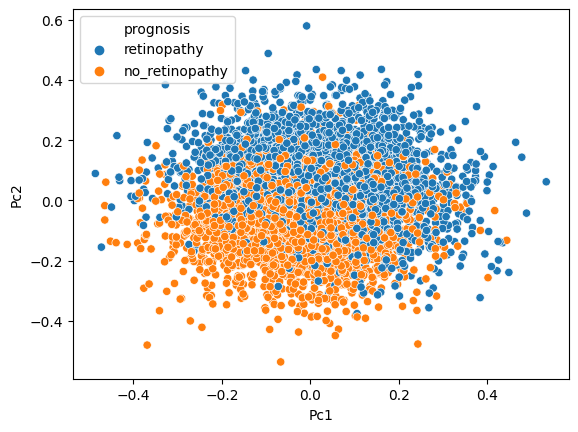

In [139]:
sns.scatterplot(x="Pc1",y="Pc2", hue="prognosis", data=pca_values);

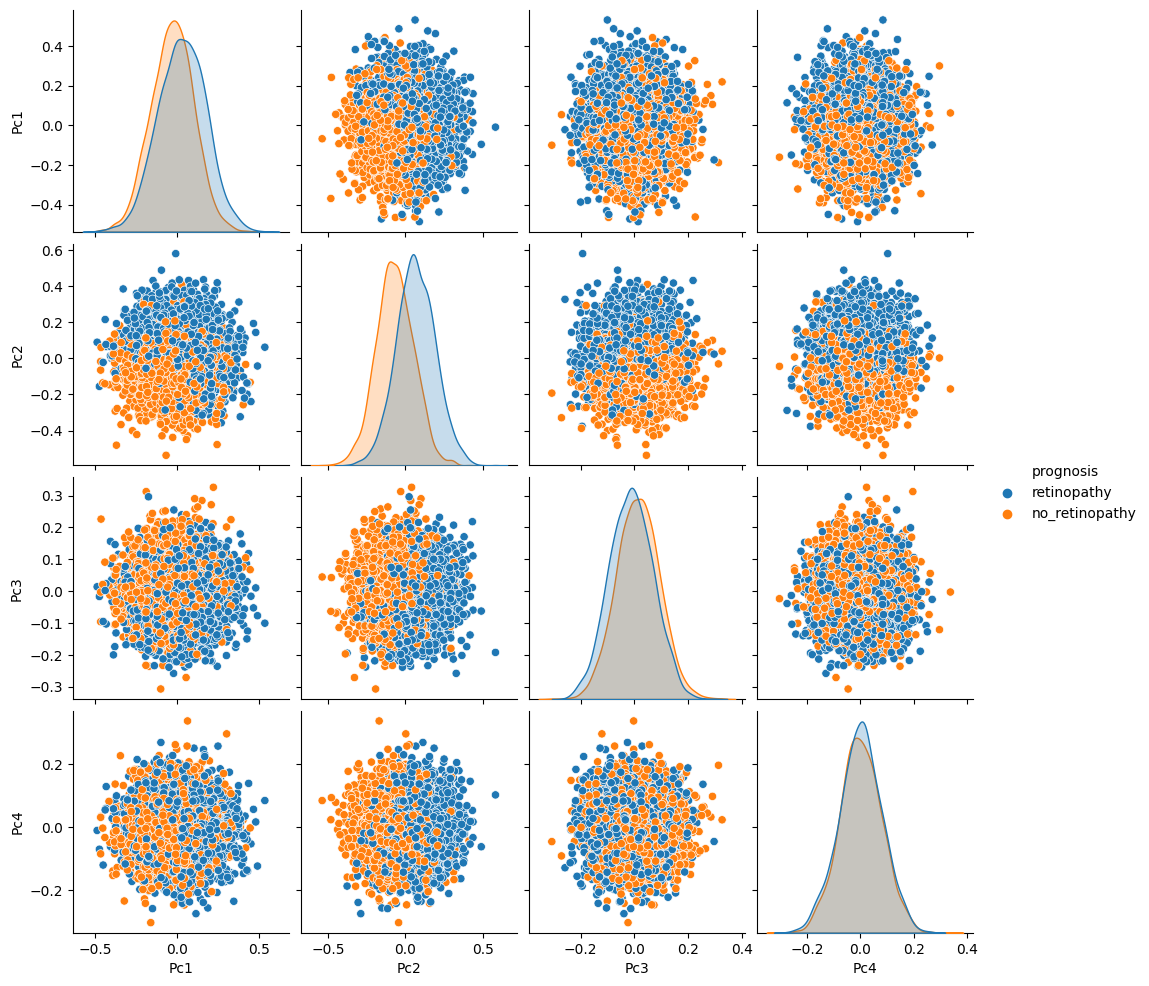

In [140]:
sns.pairplot(data=pca_values,hue="prognosis");

In [141]:
p152

age  systolic_bp  diastolic_bp  cholesterol       prognosis
ID                                                                     
0     77.196340    85.288742     80.021878    79.957109     retinopathy
1     63.529850    99.379736     84.852361   110.382411     retinopathy
2     69.003986   111.349455    109.850616   100.828246     retinopathy
3     82.638210    95.056128     79.666851    87.066303     retinopathy
4     78.346286   109.154591     90.713220    92.511770     retinopathy
...         ...          ...           ...          ...             ...
5995  49.611850    94.857639     86.615671   107.643986  no_retinopathy
5996  63.099686   100.039527     93.515186   104.971404     retinopathy
5997  55.562243    98.421446    102.697875   120.875951     retinopathy
5998  63.468956   106.809289     88.060631   106.052213     retinopathy
5999  62.506825    96.900784     86.878033   108.625436  no_retinopathy

[6000 rows x 5 columns]

In [142]:
p152.describe()

age  systolic_bp  diastolic_bp  cholesterol
count  6000.000000  6000.000000   6000.000000  6000.000000
mean     60.464121   100.694822     90.505547   100.628255
std       8.564392    10.669267      9.648200    10.433915
min      35.164761    69.675429     62.807105    69.967453
25%      54.371941    93.267420     83.641788    93.202373
50%      59.831159   100.119926     89.912429   100.060637
75%      65.809652   107.439501     96.682405   107.250829
max     103.279497   151.699660    133.456382   148.233544

In [143]:
def age_Cate(X):
    if X>=35 and X<45:
        y="35-45"
    elif X>=45 and X<55:
        y="45-55"
    elif X>=55 and X<65:
        y="55-65"
    elif X>=65 and X<75:
        y="65-75"
    elif X>=75 and X<85:
        y="75-85"
    elif X>=85 and X<95:
        y="85-95"
    elif X>=95 and X<100:
        y="95-100"
    elif X>=100 and X<105:
        y="100-105"
    return y

In [144]:
age_Cate(40)

'35-45'

In [145]:
age_lambda=lambda x:age_Cate(x)

In [146]:
p152["age_Cate"]=p152["age"].apply(age_lambda)

In [147]:
p152

age  systolic_bp  diastolic_bp  cholesterol       prognosis  \
ID                                                                        
0     77.196340    85.288742     80.021878    79.957109     retinopathy   
1     63.529850    99.379736     84.852361   110.382411     retinopathy   
2     69.003986   111.349455    109.850616   100.828246     retinopathy   
3     82.638210    95.056128     79.666851    87.066303     retinopathy   
4     78.346286   109.154591     90.713220    92.511770     retinopathy   
...         ...          ...           ...          ...             ...   
5995  49.611850    94.857639     86.615671   107.643986  no_retinopathy   
5996  63.099686   100.039527     93.515186   104.971404     retinopathy   
5997  55.562243    98.421446    102.697875   120.875951     retinopathy   
5998  63.468956   106.809289     88.060631   106.052213     retinopathy   
5999  62.506825    96.900784     86.878033   108.625436  no_retinopathy   

     age_Cate  
ID             
0       75-85  
1       55-65  
2       65-75  
3       75-85  
4       75-85  
...       ...  
5995    45-55  
5996    55-65  
5997    55-65  
5998    55-65  
5999    55-65  

[6000 rows x 6 columns]

<AxesSubplot:xlabel='age_Cate', ylabel='count'>

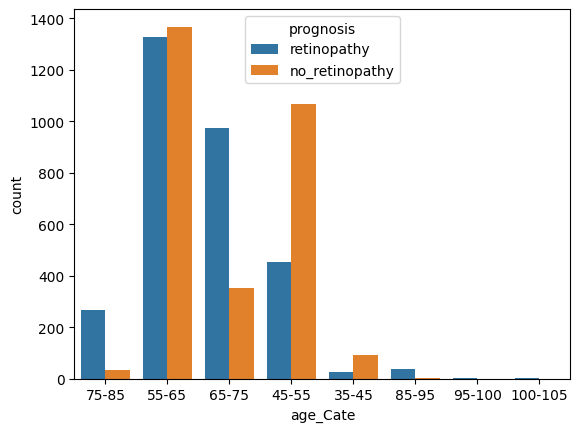

In [148]:
sns.countplot(x="age_Cate",hue="prognosis", data=p152)

In [149]:
p152_new=p152[["age_Cate","prognosis"]]

In [150]:
p152_new
p152_new_2=p152_new

In [151]:
def diastolic_bp(x):
    if x <=89:
        y="Normal_bp"
    elif x>89 and x<=96:
        y="Stage_1_hypertension"
    elif x>96 and x<=133:
        y="Stage_2_hypertension"
    elif x>133:
        y="Hypertensive_crisis"
    return y

In [152]:
def cholestrol(x):
    if x<=93:
        y="optimal"
    elif x>93 and x<=100:
        y="above_optimal"
    elif x>100 and x<=107:
        y="above_optimal"
    elif x>107 and x<=190:
        y="Borderline_high"
    return y

In [153]:
def systolic_bp(x):
    if x <=120:
        y="Normal_bp"
    elif x>120 and x<=130:
        y="Elevated"
    elif x>130 and x<=140:
        y="Stage_1_hypertension"
    elif x>140 and x<=159:
        y="Stage_2_hypertension"
    elif x>160:
        y="Stage_2_hypertension"
    return y

In [154]:
p152_new["diastolic_bp"]=p152["diastolic_bp"].apply(diastolic_bp)

In [155]:
p152_new

age_Cate       prognosis          diastolic_bp
ID                                                 
0       75-85     retinopathy             Normal_bp
1       55-65     retinopathy             Normal_bp
2       65-75     retinopathy  Stage_2_hypertension
3       75-85     retinopathy             Normal_bp
4       75-85     retinopathy  Stage_1_hypertension
...       ...             ...                   ...
5995    45-55  no_retinopathy             Normal_bp
5996    55-65     retinopathy  Stage_1_hypertension
5997    55-65     retinopathy  Stage_2_hypertension
5998    55-65     retinopathy             Normal_bp
5999    55-65  no_retinopathy             Normal_bp

[6000 rows x 3 columns]

In [156]:
p152_new["cholesterol"]=p152["cholesterol"].apply(cholestrol)


In [157]:
p152_new["systolic_bp"]=p152["systolic_bp"].apply(systolic_bp)

In [158]:
p152_new.head(2)

age_Cate    prognosis diastolic_bp      cholesterol systolic_bp
ID                                                                
0     75-85  retinopathy    Normal_bp          optimal   Normal_bp
1     55-65  retinopathy    Normal_bp  Borderline_high   Normal_bp

<AxesSubplot:xlabel='diastolic_bp', ylabel='count'>

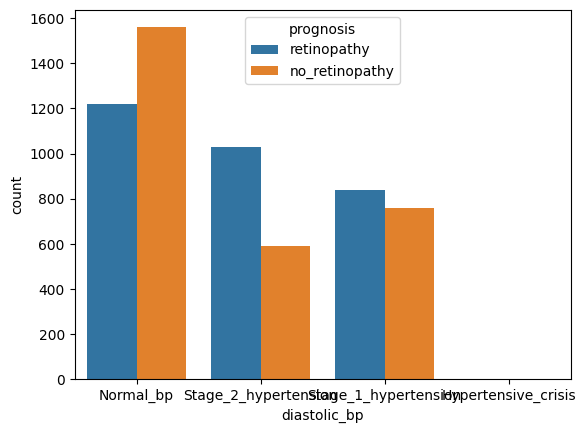

In [159]:
sns.countplot(x="diastolic_bp",hue="prognosis",data=p152_new)

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

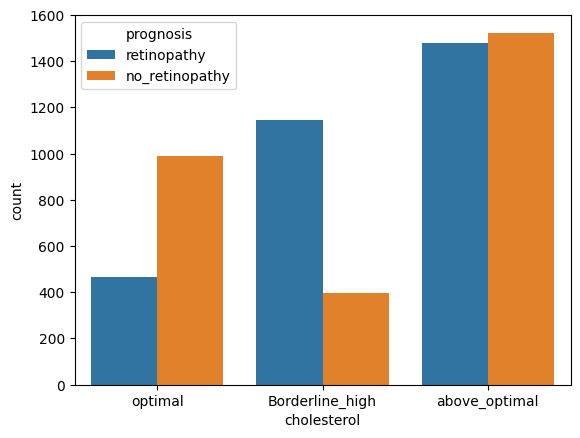

In [160]:
sns.countplot(x="cholesterol",hue="prognosis",data=p152_new)

In [161]:
p152_new.replace({"retinopathy":1,"no_retinopathy":0}, inplace=True)

In [162]:
p152_new

age_Cate  prognosis          diastolic_bp      cholesterol systolic_bp
ID                                                                         
0       75-85          1             Normal_bp          optimal   Normal_bp
1       55-65          1             Normal_bp  Borderline_high   Normal_bp
2       65-75          1  Stage_2_hypertension    above_optimal   Normal_bp
3       75-85          1             Normal_bp          optimal   Normal_bp
4       75-85          1  Stage_1_hypertension          optimal   Normal_bp
...       ...        ...                   ...              ...         ...
5995    45-55          0             Normal_bp  Borderline_high   Normal_bp
5996    55-65          1  Stage_1_hypertension    above_optimal   Normal_bp
5997    55-65          1  Stage_2_hypertension  Borderline_high   Normal_bp
5998    55-65          1             Normal_bp    above_optimal   Normal_bp
5999    55-65          0             Normal_bp  Borderline_high   Normal_bp

[6000 rows x 5 columns]

In [163]:
data=pd.get_dummies(p152_new, columns=p152_new.columns.drop("prognosis"))

In [164]:
x=data.drop("prognosis", axis=1)
y=data["prognosis"]

In [165]:
for i in range(1,20):
    model=LogisticRegression(C=i)
    model.fit(x,y)
    print(f"C:{i} ",model.score(x,y))

C:1  0.7048333333333333
C:2  0.7048333333333333
C:3  0.7048333333333333
C:4  0.7048333333333333
C:5  0.7048333333333333
C:6  0.7048333333333333
C:7  0.7048333333333333
C:8  0.7048333333333333
C:9  0.7048333333333333
C:10  0.7048333333333333
C:11  0.7048333333333333
C:12  0.7048333333333333
C:13  0.705
C:14  0.7048333333333333
C:15  0.705
C:16  0.705
C:17  0.705
C:18  0.705
C:19  0.7048333333333333


In [166]:
p152_new_2

age_Cate  prognosis          diastolic_bp      cholesterol systolic_bp
ID                                                                         
0       75-85          1             Normal_bp          optimal   Normal_bp
1       55-65          1             Normal_bp  Borderline_high   Normal_bp
2       65-75          1  Stage_2_hypertension    above_optimal   Normal_bp
3       75-85          1             Normal_bp          optimal   Normal_bp
4       75-85          1  Stage_1_hypertension          optimal   Normal_bp
...       ...        ...                   ...              ...         ...
5995    45-55          0             Normal_bp  Borderline_high   Normal_bp
5996    55-65          1  Stage_1_hypertension    above_optimal   Normal_bp
5997    55-65          1  Stage_2_hypertension  Borderline_high   Normal_bp
5998    55-65          1             Normal_bp    above_optimal   Normal_bp
5999    55-65          0             Normal_bp  Borderline_high   Normal_bp

[6000 rows x 5 columns]

In [167]:
x_pca=pca_values.drop("prognosis", axis=1)
y_pca=pca_values["prognosis"]

In [168]:
for i in range(1,20):
    model=LogisticRegression(C=i)
    model.fit(x_pca,y_pca)
    print(f"C:{i} ",model.score(x_pca,y_pca))

C:1  0.7421666666666666
C:2  0.7415
C:3  0.7423333333333333
C:4  0.7421666666666666
C:5  0.742
C:6  0.7418333333333333
C:7  0.7418333333333333
C:8  0.7418333333333333
C:9  0.7418333333333333
C:10  0.7418333333333333
C:11  0.7418333333333333
C:12  0.742
C:13  0.742
C:14  0.742
C:15  0.742
C:16  0.742
C:17  0.742
C:18  0.742
C:19  0.742


In [169]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=i)

In [170]:
for i in range(1,12):
    model=knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=i)
    model.fit(x_pca,y_pca)
    print(f"C:{i} ",model.score(x_pca,y_pca))

C:1  1.0
C:2  0.8385
C:3  0.833
C:4  0.8028333333333333
C:5  0.8041666666666667
C:6  0.7891666666666667
C:7  0.788
C:8  0.7788333333333334
C:9  0.7786666666666666
C:10  0.7751666666666667
C:11  0.7773333333333333


In [171]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pca,y_pca, random_state=42,test_size=0.2)

In [172]:
for i in range(1,30):
    model=knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=i)
    model.fit(x_train,y_train)
    print(f"C:{i} ",model.score(x_test,y_test))

C:1  0.6783333333333333
C:2  0.68
C:3  0.7133333333333334
C:4  0.7058333333333333
C:5  0.7358333333333333
C:6  0.7233333333333334
C:7  0.7433333333333333
C:8  0.735
C:9  0.7508333333333334
C:10  0.7466666666666667
C:11  0.745
C:12  0.7425
C:13  0.7466666666666667
C:14  0.7366666666666667
C:15  0.745
C:16  0.7408333333333333
C:17  0.7475
C:18  0.7408333333333333
C:19  0.7466666666666667
C:20  0.7541666666666667
C:21  0.7491666666666666
C:22  0.7483333333333333
C:23  0.7533333333333333
C:24  0.7483333333333333
C:25  0.75
C:26  0.7533333333333333
C:27  0.7525
C:28  0.7525
C:29  0.7508333333333334


In [173]:
p152.head(2)

age  systolic_bp  diastolic_bp  cholesterol    prognosis age_Cate
ID                                                                        
0   77.19634    85.288742     80.021878    79.957109  retinopathy    75-85
1   63.52985    99.379736     84.852361   110.382411  retinopathy    55-65

<AxesSubplot:xlabel='age', ylabel='systolic_bp'>

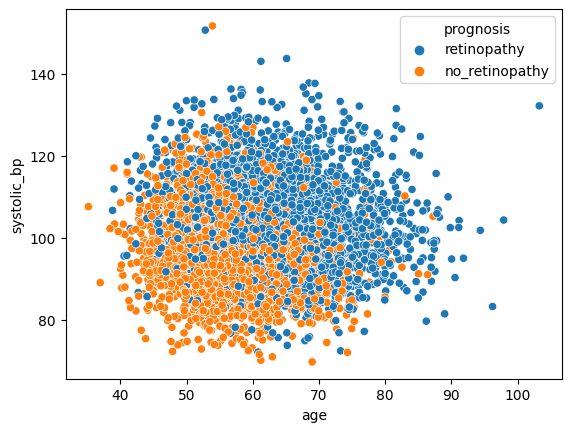

In [174]:
sns.scatterplot(x=numeric_column[0],y=numeric_column[1],data=p152, hue="prognosis")

<AxesSubplot:xlabel='systolic_bp', ylabel='diastolic_bp'>

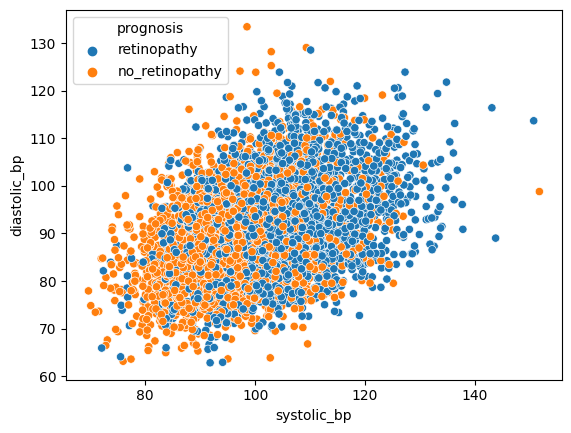

In [175]:
sns.scatterplot(x=numeric_column[1],y=numeric_column[2],data=p152, hue="prognosis")

<AxesSubplot:xlabel='age', ylabel='diastolic_bp'>

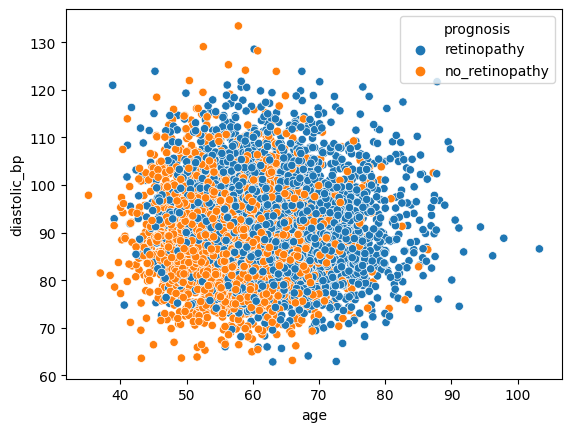

In [176]:
sns.scatterplot(x=numeric_column[0],y=numeric_column[2],data=p152, hue="prognosis")

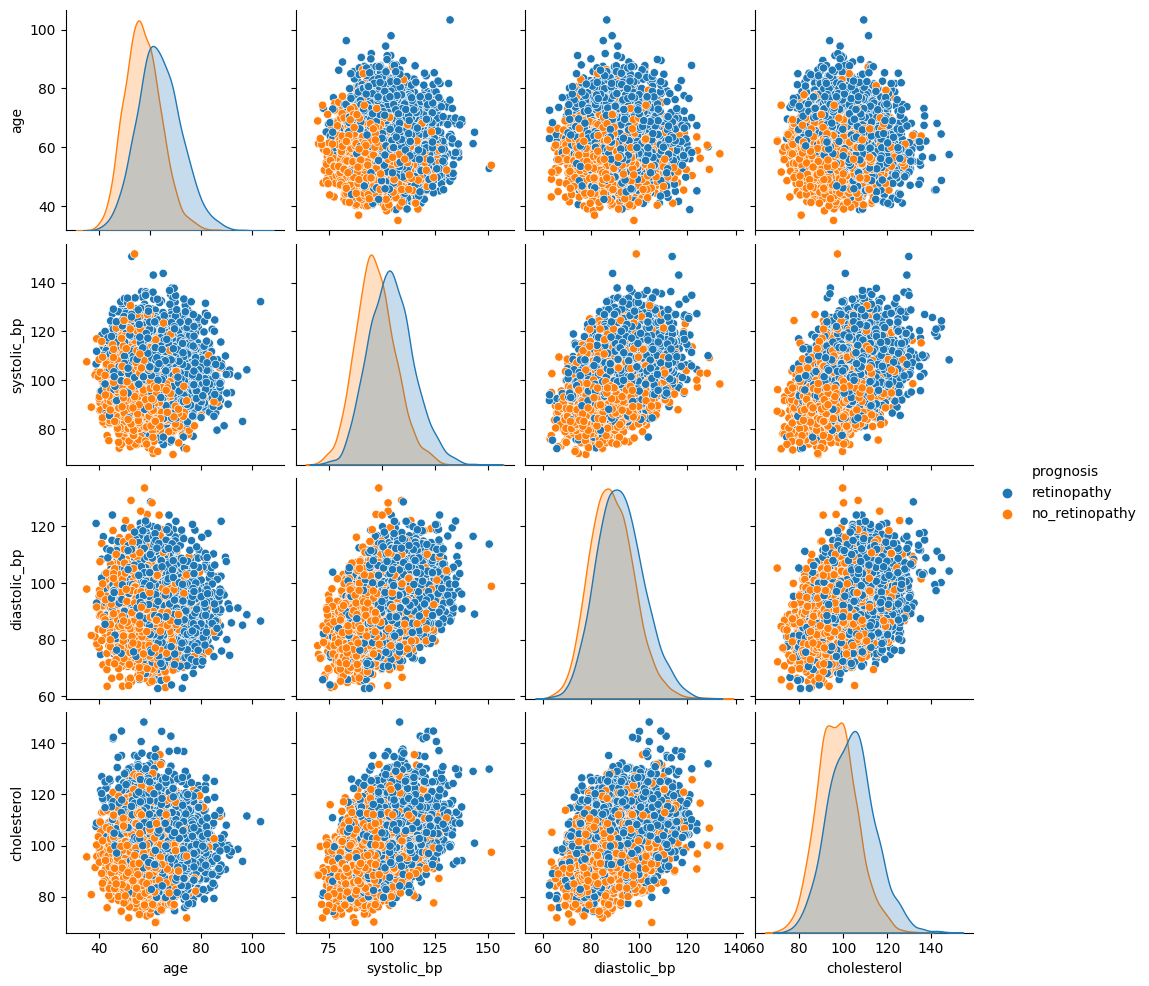

In [177]:
sns.pairplot(p152, hue="prognosis");

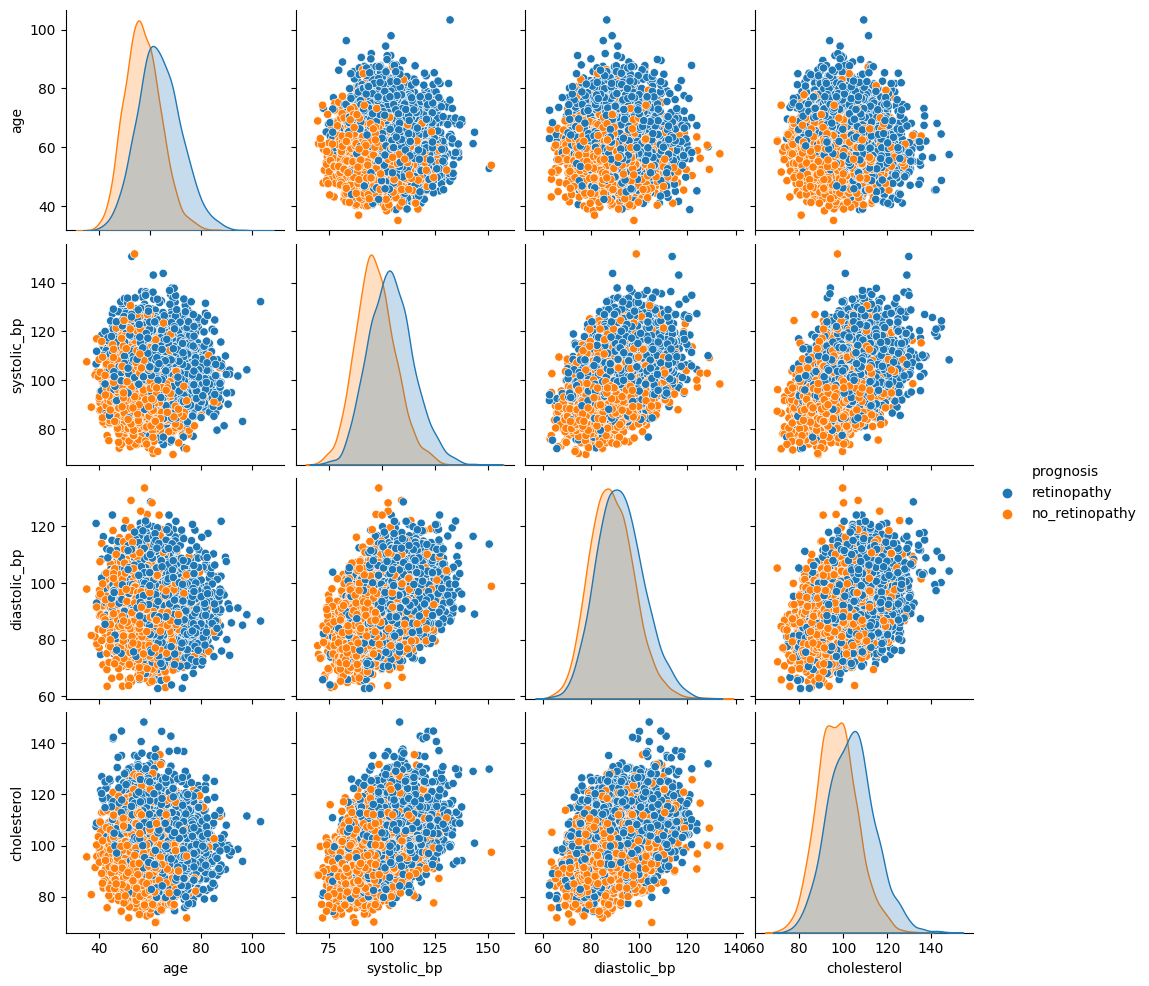

In [178]:
sns.pairplot(p152, hue="prognosis");

<AxesSubplot:xlabel='age', ylabel='cholesterol'>

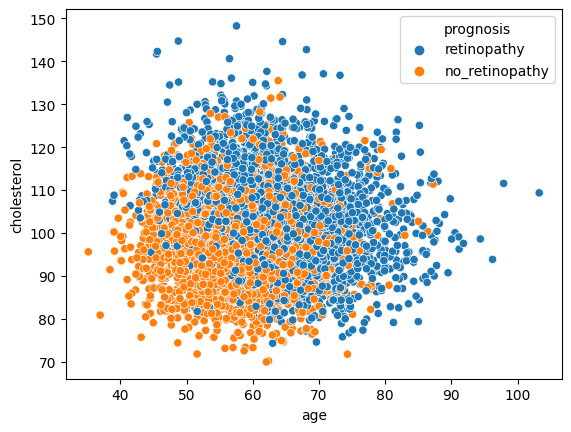

In [179]:
sns.scatterplot(x=numeric_column[0],y=numeric_column[3],data=p152, hue="prognosis")

<AxesSubplot:xlabel='systolic_bp', ylabel='cholesterol'>

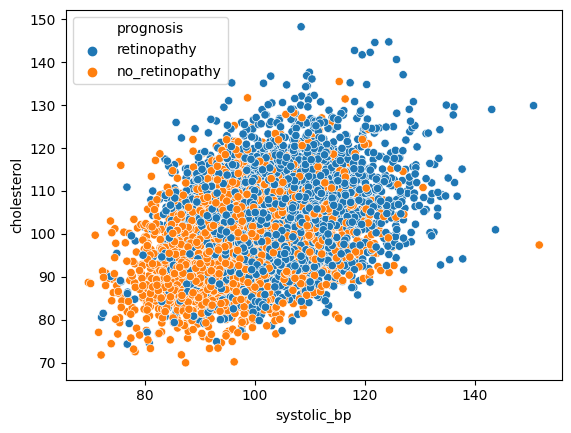

In [180]:
sns.scatterplot(x=numeric_column[1],y=numeric_column[3],data=p152, hue="prognosis")

<AxesSubplot:xlabel='diastolic_bp', ylabel='cholesterol'>

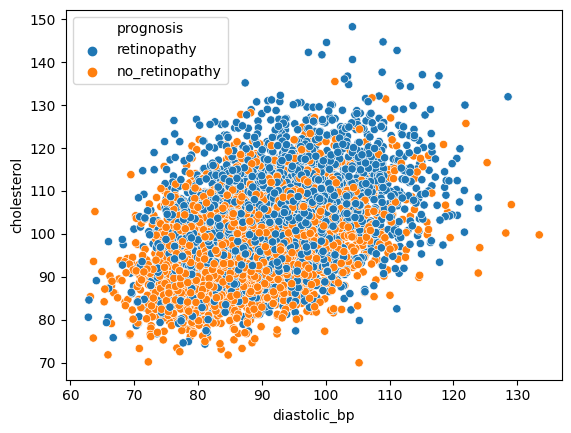

In [181]:
sns.scatterplot(x=numeric_column[2],y=numeric_column[3],data=p152, hue="prognosis")

In [182]:
from mpl_toolkits import mplot3d

In [183]:
p152.columns

Index(['age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis',
       'age_Cate'],
      dtype='object')

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

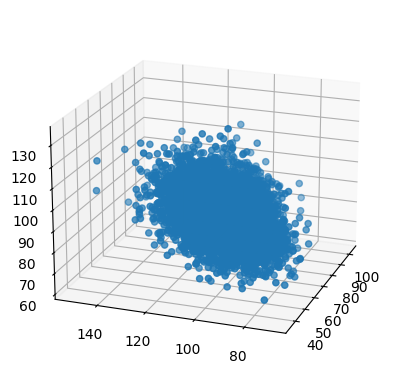

In [184]:
ax=plt.axes(projection="3d")
ax.scatter3D(p152["age"],p152["systolic_bp"],p152["diastolic_bp"],cmap="Greens")
ax.view_init(20,200)
plt.figure

In [185]:
p152

age  systolic_bp  diastolic_bp  cholesterol       prognosis  \
ID                                                                        
0     77.196340    85.288742     80.021878    79.957109     retinopathy   
1     63.529850    99.379736     84.852361   110.382411     retinopathy   
2     69.003986   111.349455    109.850616   100.828246     retinopathy   
3     82.638210    95.056128     79.666851    87.066303     retinopathy   
4     78.346286   109.154591     90.713220    92.511770     retinopathy   
...         ...          ...           ...          ...             ...   
5995  49.611850    94.857639     86.615671   107.643986  no_retinopathy   
5996  63.099686   100.039527     93.515186   104.971404     retinopathy   
5997  55.562243    98.421446    102.697875   120.875951     retinopathy   
5998  63.468956   106.809289     88.060631   106.052213     retinopathy   
5999  62.506825    96.900784     86.878033   108.625436  no_retinopathy   

     age_Cate  
ID             
0       75-85  
1       55-65  
2       65-75  
3       75-85  
4       75-85  
...       ...  
5995    45-55  
5996    55-65  
5997    55-65  
5998    55-65  
5999    55-65  

[6000 rows x 6 columns]

In [186]:
p152_new

age_Cate  prognosis          diastolic_bp      cholesterol systolic_bp
ID                                                                         
0       75-85          1             Normal_bp          optimal   Normal_bp
1       55-65          1             Normal_bp  Borderline_high   Normal_bp
2       65-75          1  Stage_2_hypertension    above_optimal   Normal_bp
3       75-85          1             Normal_bp          optimal   Normal_bp
4       75-85          1  Stage_1_hypertension          optimal   Normal_bp
...       ...        ...                   ...              ...         ...
5995    45-55          0             Normal_bp  Borderline_high   Normal_bp
5996    55-65          1  Stage_1_hypertension    above_optimal   Normal_bp
5997    55-65          1  Stage_2_hypertension  Borderline_high   Normal_bp
5998    55-65          1             Normal_bp    above_optimal   Normal_bp
5999    55-65          0             Normal_bp  Borderline_high   Normal_bp

[6000 rows x 5 columns]

In [187]:
pca_values

Pc1       Pc2       Pc3       Pc4       prognosis
0    -0.357581  0.141014  0.061432  0.055721     retinopathy
1    -0.005688  0.060812 -0.075713 -0.084602     retinopathy
2     0.124390  0.195973  0.107126  0.076687     retinopathy
3    -0.279133  0.242723 -0.023174  0.059560     retinopathy
4    -0.081250  0.258113 -0.007308  0.113093     retinopathy
...        ...       ...       ...       ...             ...
5995  0.051202 -0.182118 -0.030145 -0.091094  no_retinopathy
5996  0.027867  0.065449  0.015953 -0.034439     retinopathy
5997  0.188317 -0.013407  0.051186 -0.143624     retinopathy
5998  0.033740  0.074937 -0.067935 -0.004832     retinopathy
5999 -0.009316  0.041857 -0.039119 -0.086629  no_retinopathy

[6000 rows x 5 columns]

<AxesSubplot:xlabel='Pc1', ylabel='Pc2'>

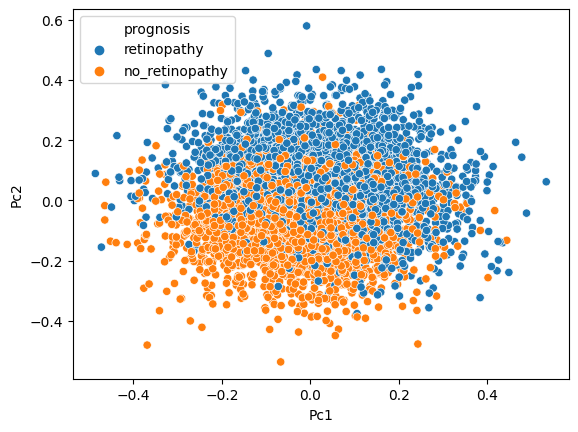

In [188]:
sns.scatterplot("Pc1","Pc2",hue="prognosis",data=pca_values)

<AxesSubplot:xlabel='Pc1', ylabel='Pc3'>

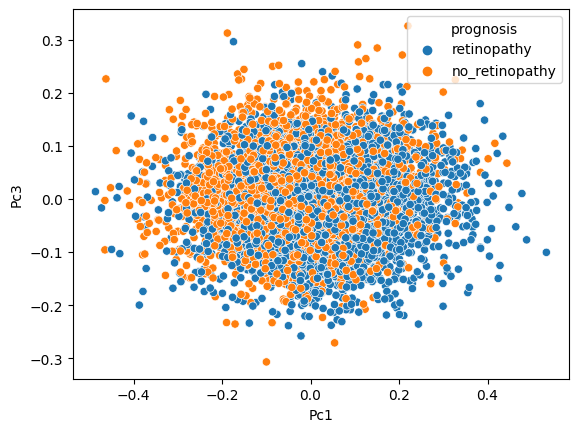

In [189]:
sns.scatterplot("Pc1","Pc3",hue="prognosis",data=pca_values)

<AxesSubplot:xlabel='Pc1', ylabel='Pc4'>

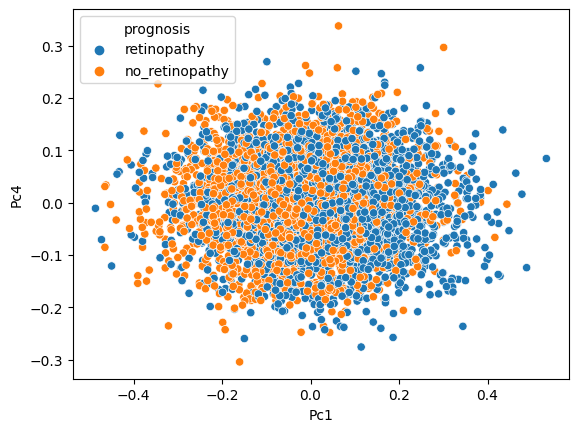

In [190]:
sns.scatterplot("Pc1","Pc4",hue="prognosis",data=pca_values)

In [191]:
pca.components_

array([[-0.340348  ,  0.54776159,  0.55550842,  0.52491035],
       [ 0.94019009,  0.21063975,  0.19429614,  0.18418061],
       [ 0.00902026, -0.49120981,  0.80473913, -0.33320637],
       [-0.01115648,  0.64366222,  0.07780958, -0.76126221]])

<AxesSubplot:xlabel='Pc2', ylabel='Pc3'>

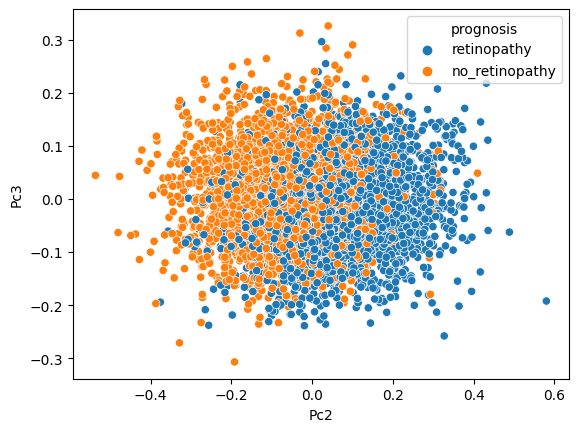

In [192]:
sns.scatterplot("Pc2","Pc3",hue="prognosis",data=pca_values)

<AxesSubplot:xlabel='Pc2', ylabel='Pc4'>

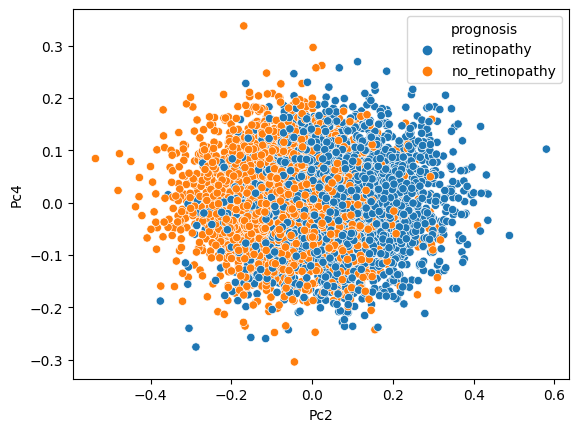

In [193]:
sns.scatterplot("Pc2","Pc4",hue="prognosis",data=pca_values)

<AxesSubplot:xlabel='Pc3', ylabel='Pc4'>

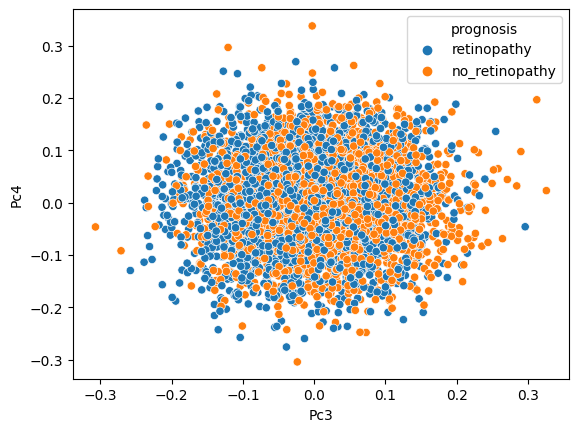

In [194]:
sns.scatterplot("Pc3","Pc4",hue="prognosis",data=pca_values)

In [195]:
p152_new

age_Cate  prognosis          diastolic_bp      cholesterol systolic_bp
ID                                                                         
0       75-85          1             Normal_bp          optimal   Normal_bp
1       55-65          1             Normal_bp  Borderline_high   Normal_bp
2       65-75          1  Stage_2_hypertension    above_optimal   Normal_bp
3       75-85          1             Normal_bp          optimal   Normal_bp
4       75-85          1  Stage_1_hypertension          optimal   Normal_bp
...       ...        ...                   ...              ...         ...
5995    45-55          0             Normal_bp  Borderline_high   Normal_bp
5996    55-65          1  Stage_1_hypertension    above_optimal   Normal_bp
5997    55-65          1  Stage_2_hypertension  Borderline_high   Normal_bp
5998    55-65          1             Normal_bp    above_optimal   Normal_bp
5999    55-65          0             Normal_bp  Borderline_high   Normal_bp

[6000 rows x 5 columns]